# Desafio 6

Neste desafio, vamos praticar _feature engineering_, um dos processos mais importantes e trabalhosos de ML. Utilizaremos o _data set_ [Countries of the world](https://www.kaggle.com/fernandol/countries-of-the-world), que contém dados sobre os 227 países do mundo com informações sobre tamanho da população, área, imigração e setores de produção.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

from sklearn.preprocessing import (KBinsDiscretizer, LabelEncoder,
                                   OneHotEncoder, StandardScaler,FunctionTransformer)
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer



In [2]:
# Algumas configurações para o matplotlib.
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
countries = pd.read_csv("countries.csv")

In [4]:
new_column_names = [
    "Country", "Region", "Population", "Area", "Pop_density", "Coastline_ratio",
    "Net_migration", "Infant_mortality", "GDP", "Literacy", "Phones_per_1000",
    "Arable", "Crops", "Other", "Climate", "Birthrate", "Deathrate", "Agriculture",
    "Industry", "Service"
]

countries.columns = new_column_names

countries.head(5)

,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [5]:
countries.shape

(227, 20)

## Observações

Esse _data set_ ainda precisa de alguns ajustes iniciais. Primeiro, note que as variáveis numéricas estão usando vírgula como separador decimal e estão codificadas como strings. Corrija isso antes de continuar: transforme essas variáveis em numéricas adequadamente.

Além disso, as variáveis `Country` e `Region` possuem espaços a mais no começo e no final da string. Você pode utilizar o método `str.strip()` para remover esses espaços.

## Inicia sua análise a partir daqui

In [6]:
# Sua análise começa aqui.
#print (countries.dtypes.unique().size)
#print (countries.dtypes.unique())

#countries['Pop_density'] = pd.to_numeric(countries['Pop_density'], errors='coerce')
#countries['Pop_density'].astype(float)
#countries['Pop_density'] = countries.Pop_density.astype(float)

colunms_para_inteiro = ['Pop_density', 'Coastline_ratio', 'Net_migration', 'Infant_mortality', 'Literacy', 'Phones_per_1000', 'Arable', 'Crops', 'Other', 'Climate','Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']


for i in colunms_para_inteiro:
    #print (i)
    #print ('So I said, "You don\'t know me! You\'ll never understand me!"')
    #print (countries[i])
    countries[i] = countries[i].str.replace(',', '.').astype(float)
    



countries['Country'] = countries.Country.str.strip()
countries['Region'] = countries.Region.str.strip()


 

In [7]:
print (countries.dtypes)
countries.head(5)

Country              object
Region               object
Population            int64
Area                  int64
Pop_density         float64
Coastline_ratio     float64
Net_migration       float64
Infant_mortality    float64
GDP                 float64
Literacy            float64
Phones_per_1000     float64
Arable              float64
Crops               float64
Other               float64
Climate             float64
Birthrate           float64
Deathrate           float64
Agriculture         float64
Industry            float64
Service             float64
dtype: object


,Country,Region,Population,Area,Pop_density,Coastline_ratio,Net_migration,Infant_mortality,GDP,Literacy,Phones_per_1000,Arable,Crops,Other,Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


## Questão 1

Quais são as regiões (variável `Region`) presentes no _data set_? Retorne uma lista com as regiões únicas do _data set_ com os espaços à frente e atrás da string removidos (mas mantenha pontuação: ponto, hífen etc) e ordenadas em ordem alfabética.

In [8]:
def q1():
    # Retorne aqui o resultado da questão 1.
    region = countries['Region'].unique().tolist()
    region.sort()
    print (region)
    #print ( np.sort(countries['Region'].unique()).tolist())
    return region




    

## Questão 2

Discretizando a variável `Pop_density` em 10 intervalos com `KBinsDiscretizer`, seguindo o encode `ordinal` e estratégia `quantile`, quantos países se encontram acima do 90º percentil? Responda como um único escalar inteiro.

In [9]:
def q2():
    est = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    #print (est)
    discretizando = est.fit_transform(np.array(countries["Pop_density"]).reshape(-1, 1))
    #print (discretizando)
    # obtendo 90º percentil
    percentil90 = np.quantile(discretizando, 0.9)
    #print (percentil90)
    
    resposta = len(discretizando[discretizando > percentil90])
    #print (resposta)
    
    return int(resposta)
    
    
    # Retorne aqui o resultado da questão 2.
    


# Questão 3

Se codificarmos as variáveis `Region` e `Climate` usando _one-hot encoding_, quantos novos atributos seriam criados? Responda como um único escalar.

In [10]:
def q3():
    
    #print (countries['Region'].unique())
    
    #print (countries['Climate'].unique())
    
    
    #label_encoder = LabelEncoder()
    #Regioes = label_encoder.fit_transform(countries["Region"])
    #climate = label_encoder.fit_transform(countries["Climate"])
    #countries["Climate"] = label_encoder.fit_transform(countries["Climate"])
    #countries["Region"] = label_encoder.fit_transform(countries["Region"])
    #diferentes_climas = (countries["Climate"].nunique())
    #diferentes_regioes = (countries["Region"].nunique())
    #print (diferentes_climas + diferentes_regioes)
    #return int(diferentes_climas + diferentes_regioes)
    
    #one-hot_encoding
    
       # Retorne aqui o resultado da questão 3.
    
    # objeto para converter categórico para numérico
    le = preprocessing.LabelEncoder()
    
    # objeto para aplicar oneHot
    enc = OneHotEncoder(handle_unknown='ignore')
    
    # variável temporária
    data = countries[["Region", "Climate"]]
    
    data.fillna({"Climate": 0}, inplace=True)
    
    # transformando colunas region em numérica
    data["Region"] = le.fit_transform(data["Region"])
    
    # aplicando o oneHotEncoding
    values = enc.fit_transform(data).toarray()
    
    # Pegando os nomes das novas colunas
    colNames = list(enc.get_feature_names(["Region", "Climate"]))
    
    # criando o dataframe com os novos dados
    newData = pd.DataFrame(values, columns=colNames)
     
    # obtendo o número de novas colunas adicionadas
    colunas = int(newData.shape[1])
    print(colunas)
    
    
    #getdummies
    
    resultado_get_dummies = pd.get_dummies(countries[['Region', 'Climate']].fillna('NaN'))
    #print (resultado_get_dummies)

    resultado = int(resultado_get_dummies.shape[1])
    #print (resultado)
    
    return resultado

    
    
    
    # Retorne aqui o resultado da questão 3.
    

## Questão 4

Aplique o seguinte _pipeline_:

1. Preencha as variáveis do tipo `int64` e `float64` com suas respectivas medianas.
2. Padronize essas variáveis.

Após aplicado o _pipeline_ descrito acima aos dados (somente nas variáveis dos tipos especificados), aplique o mesmo _pipeline_ (ou `ColumnTransformer`) ao dado abaixo. Qual o valor da variável `Arable` após o _pipeline_? Responda como um único float arredondado para três casas decimais.

In [11]:
#deixar apenas variaveis numericas(int64 e float64)
df_col = countries.columns.drop(['Country', 'Region'])
df_num = countries[df_col].astype(float)
print (df_num)



test_country = [
    'Test Country', 'NEAR EAST', -0.19032480757326514,
    -0.3232636124824411, -0.04421734470810142, -0.27528113360605316,
    0.13255850810281325, -0.8054845935643491, 1.0119784924248225,
    0.6189182532646624, 1.0074863283776458, 0.20239896852403538,
    -0.043678728558593366, -0.13929748680369286, 1.3163604645710438,
    -0.3699637766938669, -0.6149300604558857, -0.854369594993175,
    0.263445277972641, 0.5712416961268142
]

row_test_country = pd.DataFrame([test_country], columns = new_column_names)
row_test_country.info()

      Population       Area  Pop_density  Coastline_ratio  Net_migration  \
0     31056997.0   647500.0         48.0             0.00          23.06   
1      3581655.0    28748.0        124.6             1.26          -4.93   
2     32930091.0  2381740.0         13.8             0.04          -0.39   
3        57794.0      199.0        290.4            58.29         -20.71   
4        71201.0      468.0        152.1             0.00           6.60   
5     12127071.0  1246700.0          9.7             0.13           0.00   
6        13477.0      102.0        132.1            59.80          10.76   
7        69108.0      443.0        156.0            34.54          -6.15   
8     39921833.0  2766890.0         14.4             0.18           0.61   
9      2976372.0    29800.0         99.9             0.00          -6.47   
10       71891.0      193.0        372.5            35.49           0.00   
11    20264082.0  7686850.0          2.6             0.34           3.98   
12     81928

In [12]:
def q4():
    
    num_pipeline = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("std_scaler", StandardScaler())])    
    
    #print (num_pipeline)
    test_country_num = row_test_country.drop(['Country', 'Region'], axis = 1)
    #print (test_country_num)
    test_country_cat = row_test_country[['Country', 'Region']]
    #print (test_country_cat)
    df_num_fit = num_pipeline.fit(df_num)
    print (df_num_fit)
    test_cty_transf = num_pipeline.transform(test_country_num)
    print (test_cty_transf)
    test_cty_transf_df = pd.DataFrame(test_cty_transf, columns = df_num.columns)
    print (test_cty_transf_df)
    result = float(test_cty_transf_df['Arable'].round(3))
    print (result)
    return result



## Questão 5

Descubra o número de _outliers_ da variável `Net_migration` segundo o método do _boxplot_, ou seja, usando a lógica:

$$x \notin [Q1 - 1.5 \times \text{IQR}, Q3 + 1.5 \times \text{IQR}] \Rightarrow x \text{ é outlier}$$

que se encontram no grupo inferior e no grupo superior.

Você deveria remover da análise as observações consideradas _outliers_ segundo esse método? Responda como uma tupla de três elementos `(outliers_abaixo, outliers_acima, removeria?)` ((int, int, bool)).

In [13]:
def q5():
    

    #quartis
    Q1 = countries['Net_migration'].quantile(q= 0.25)
    Q3 = countries['Net_migration'].quantile(q= 0.75)

    # Intervalo interquartil:
    IQR = Q3 - Q1

   # Limite inferior:
    lim_max = (countries['Net_migration'] < (Q1 - 1.5 * IQR)).sum()
    # Limite superior:
    lim_min = (countries['Net_migration'] > (Q3 + 1.5 * IQR)).sum()
    
    # Número de outliers:
    return int(lim_max), int(lim_min),False
q5()

(24, 26, False)

ValueError: cannot convert float NaN to integer

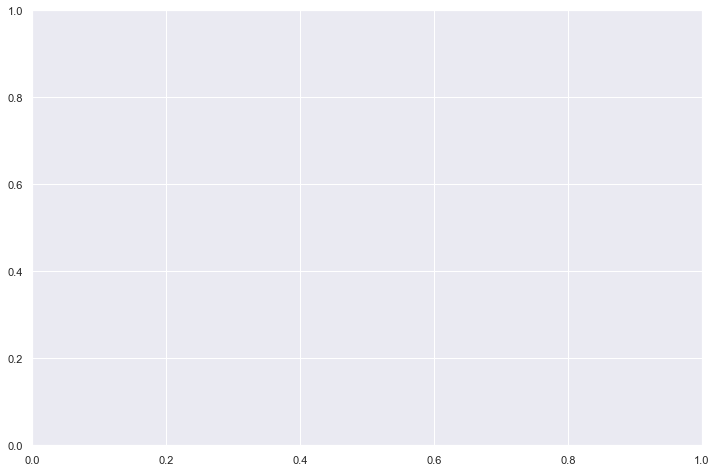

In [14]:
#Visualização utilizando histograma:
#sns.distplot(countries['Net_migration'], color='m');

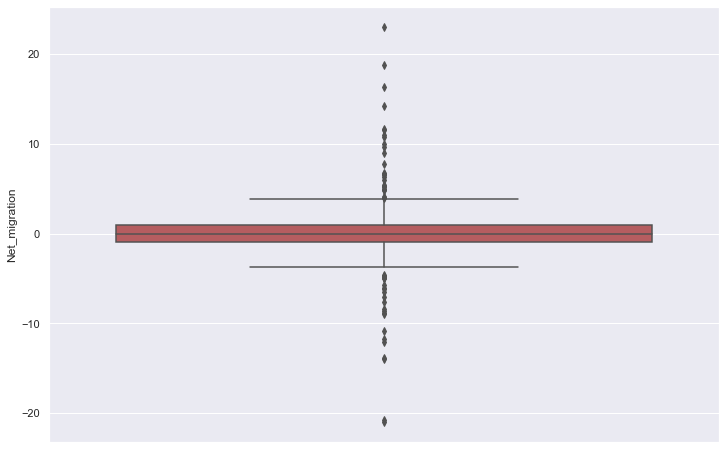

In [15]:
#Visualização utilizando boxplot:
ax = sns.boxplot(countries['Net_migration'], orient='vertical',color='r');

In [16]:

#Tratar outliers:

#Podemos eliminá-los da nossa amostra;
#Podemos analisá-los de forma separada,
#Podemos realizar alguma transformação matemática para reduzir a variação dos dados.
#O intervalo interquartil é uma medida de dispersão utilizada em estatística descritiva. Seu cálculo se da pela subtração do 3° quartil pelo 1° quartil.

#POdemos considerar como outliers os valores menores que Q1-1,5*IQR ou valores maiores que Q3+1,5*IQR.

SyntaxError: invalid syntax (<ipython-input-16-c3ec42c0e5e7>, line 2)

## Questão 6
Para as questões 6 e 7 utilize a biblioteca `fetch_20newsgroups` de datasets de test do `sklearn`

Considere carregar as seguintes categorias e o dataset `newsgroups`:

```
categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
```


Aplique `CountVectorizer` ao _data set_ `newsgroups` e descubra o número de vezes que a palavra _phone_ aparece no corpus. Responda como um único escalar.

In [23]:
def q6():
    categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']
    
    #print (categories)

    newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    print(newsgroup)
    
    count_vectorizer = CountVectorizer()

    newsgroups_counts = count_vectorizer.fit_transform(newsgroup.data)
    
    #print (newsgroups_counts)
    #print (count_vectorizer.vocabulary_)
    #print(int(newsgroups_counts[:, count_vectorizer.vocabulary_["phone"]].toarray().sum()))
    
    
    return int(newsgroups_counts[:, count_vectorizer.vocabulary_["phone"]].toarray().sum())

    


{'data': ['From: rubin@cis.ohio-state.edu (Daniel J Rubin)\nSubject: Re: what to do with old 256k SIMMs?\nOrganization: The Ohio State University Dept. of Computer and Info. Science\nLines: 18\nNNTP-Posting-Host: diplodocus.cis.ohio-state.edu\n\n>>\tI was wondering if people had any good uses for old\n>>256k SIMMs.  I have a bunch of them for the Apple Mac\n>>and I know lots of other people do to.  I have tried to\n>>sell them but have gotten NO interest.\n\nHow hard would it be to somehow interface them to some of the popular \nMotorola microcontrollers.  I am a novice at microcontrollers, but I am\nstarting to get into them for some of my projects.  I have several 256k\nSIMMs laying around from upgraded Macs and if I could use them as "free"\nmemory in one or two of my projects that would be great.  One project that\ncomes to mind is a Caller ID device that would require quite a bit of RAM\nto store several hundered CID records etc...\n\n                                              

NameError: name 'newsgroup' is not defined

## Questão 7

Aplique `TfidfVectorizer` ao _data set_ `newsgroups` e descubra o TF-IDF da palavra _phone_. Responda como um único escalar arredondado para três casas decimais.

In [28]:
tfidf_vectorizer = TfidfVectorizer()

categories = ['sci.electronics', 'comp.graphics', 'rec.motorcycles']

newsgroup = fetch_20newsgroups(subset="train", categories=categories, shuffle=True, random_state=42)
    

tfidf_vectorizer.fit(newsgroup.data)

newsgroups_tfidf_vectorized = tfidf_vectorizer.transform(newsgroup.data)

In [29]:
def q7():
    
    idf_value = newsgroups_tfidf_vectorized[:, tfidf_vectorizer.vocabulary_["phone"]].toarray().sum()
    
    return float(round(idf_value, 3))


8.888